### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측
- 데이터셋: 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수 
- 학습방법 : 지도학습 + 회귀 
- 학습알고리즘 : 선형회귀분석 <= 데이터분포가 선형 분포가 되어야함

[1] 데이터준비

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
jumsu = range(7,100,7)
len(jumsu), jumsu[-1]
hour = list(range(1,29,2))
len(hour), hour

(14, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

In [117]:
# List => DataFrame으로 변환
hourDF = pd.DataFrame(hour,columns=['Hour'])
hourDF.head()

jumsuSR = pd.Series(jumsu)
print(hourDF.head(), jumsuSR.head(), sep='\n\n')

   Hour
0     1
1     3
2     5
3     7
4     9

0     7
1    14
2    21
3    28
4    35
dtype: int64


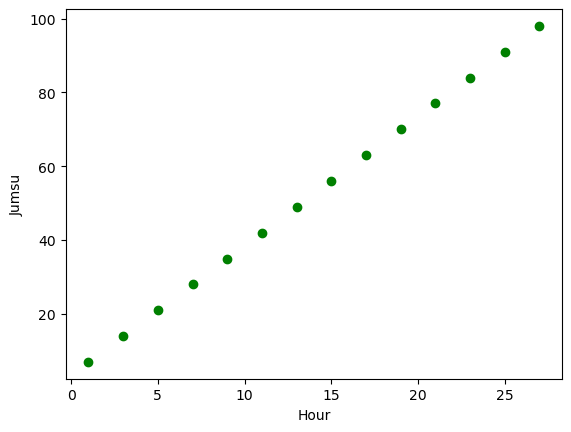

In [118]:
# 현재 데이터의 분포 확인 
plt.plot(hourDF,jumsuSR,'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행 

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [121]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기 
model.fit(hourDF,jumsuSR)

LinearRegression()

In [122]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_}, 절편 : {model.intercept_}')

기울기 : [3.5], 절편 : 3.500000000000014


In [123]:
# y = ax+b
pre_jumsu = model.coef_[0] * hourDF + model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1)

In [124]:
# 실제 점수와 예측 점수의 차이 확인 
# pre_jumsu -> ndarray 형태 
real_jumsu=jumsuSR.to_numpy()
real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

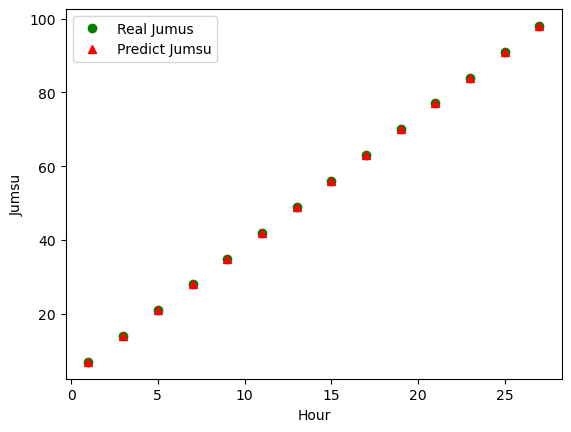

In [125]:
# 현재 데이터의 분포 확인 
plt.plot(hourDF,jumsuSR,'go',label='Real Jumus')
plt.plot(hourDF,pre_jumsu,'r^',label='Predict Jumsu')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가 

In [126]:
model.score(hourDF,jumsuSR)

1.0

In [127]:
# 오차 계산 즉 , 손실/비용함수 확인
# root_mean_squared_error ==> version 1.4 이상 사용가능 
# 나는 1.3임
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [128]:
import sklearn
sklearn.__version__

'1.3.0'

In [129]:
pre_y = model.predict(hourDF)

In [130]:
mse = mean_squared_error(jumsuSR, pre_y)
rmse = mean_squared_error(jumsuSR,pre_y,squared=False)
mae=mean_absolute_error(jumsuSR,pre_y)
r2 = r2_score(jumsuSR,pre_y)

In [131]:
# 손실/비용 함수 값은 0에 가까울 수록 
# 결정계수 값은 1에 가까울 수록 성능이 좋은 모델 
print(f' mse : {mse}')
print(f' rmse : {rmse}')
print(f' mae : {mae}')
print(f' r2 : {r2}')

 mse : 6.857455154671224e-29
 rmse : 8.280975277508818e-15
 mae : 6.026924990822278e-15
 r2 : 1.0
